In [6]:
import pandas as pd

In [7]:
df=pd.read_csv(r"C:\Users\sachi\OneDrive\Product Demand Forecasting\Merge File\Master_file.csv")

In [8]:
df.sample(10)

,productid,location,date,unitssold,promocodeused,price,discount_percent,competitorprice,adcampaign,finalprice,...,brand,material,weight(kg),warranty(years),productrating,launchyear,stocklevel,supplierdelay(days),warehouse,inventorytype
18792,P0080,L01,2024-10-11,10,No,300.5,0.0,315.525,NaN,300.5,...,BrandD,Metal,4.49,1,4.8,2020,151,3,W1,Fresh
459282,P0160,L05,2024-08-10,1,No,300.5,0.0,315.525,NaN,300.5,...,BrandC,Wood,1.63,0,4.8,2023,166,10,W1,Returned
432406,P0446,L04,2024-02-08,0,No,300.5,0.0,315.525,NaN,300.5,...,BrandD,Wood,4.27,0,4.4,2021,160,3,W1,Repaired
218088,P0225,L01,2024-11-17,4,No,300.5,0.0,315.525,NaN,300.5,...,BrandA,Plastic,2.52,0,3.3,2019,165,7,W1,Returned
173860,P0474,L01,2024-07-01,2,No,300.5,0.0,315.525,NaN,300.5,...,BrandC,Cotton,2.75,0,4.8,2020,36,3,W3,Fresh
48272,P0328,L01,2024-09-25,5,No,321.4,0.0,348.440,Tv,321.4,...,BrandB,Metal,2.12,2,2.7,2020,145,2,W3,Repaired
113712,P0089,L05,2024-03-22,4,No,300.5,0.0,315.525,NaN,300.5,...,BrandA,Metal,4.35,3,3.7,2019,176,7,W1,Fresh
140616,P0204,L06,2024-11-17,4,No,300.5,0.0,315.525,NaN,300.5,...,BrandA,Cotton,3.33,2,2.6,2020,141,7,W1,Repaired
405840,P0386,L03,2024-08-05,2,No,300.5,0.0,315.525,NaN,300.5,...,BrandD,Wood,1.10,1,3.6,2022,147,10,W2,Fresh
405807,P0318,L07,2024-03-28,10,No,300.5,0.0,315.525,NaN,300.5,...,BrandC,Wood,0.53,1,4.8,2020,51,7,W1,Fresh


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

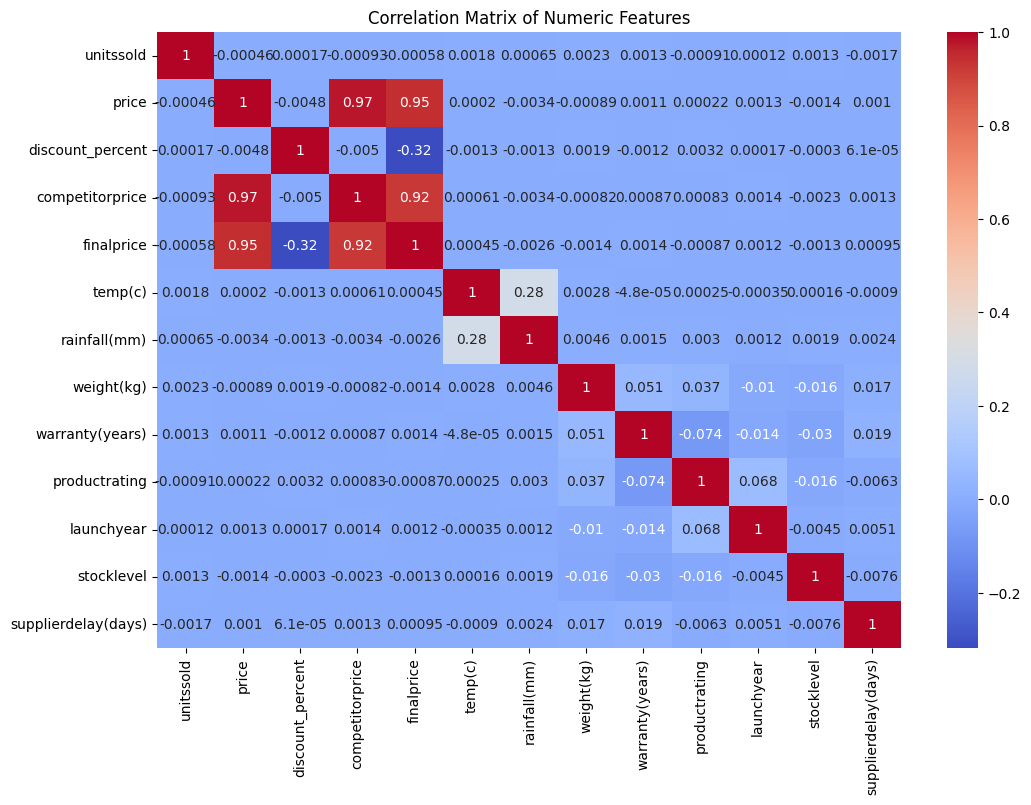

In [10]:
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation on numeric columns only
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [11]:
# Drop 'finalprice' if it's just price adjusted with discount
df.drop(['finalprice'], axis=1, inplace=True)


In [12]:
# Price difference with competitors
df['price_diff'] = df['price'] - df['competitorprice']


In [13]:
import numpy as np

In [14]:
corr = df.select_dtypes(include='number').corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.85)]
print("Highly correlated features (>|0.85|):", high_corr_features)


Highly correlated features (>|0.85|): ['competitorprice']
